In [28]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-05-29 01:30:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.211.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  92.6MB/s    in 0.7s    

2021-05-29 01:30:33 (92.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [29]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [30]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [31]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.628.jpg', 'cat.948.jpg', 'cat.486.jpg', 'cat.499.jpg', 'cat.986.jpg', 'cat.744.jpg', 'cat.835.jpg', 'cat.366.jpg', 'cat.925.jpg', 'cat.181.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [32]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [33]:
  %matplotlib inline

  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg

  nrows = 4
  ncols = 4

  pic_index = 0

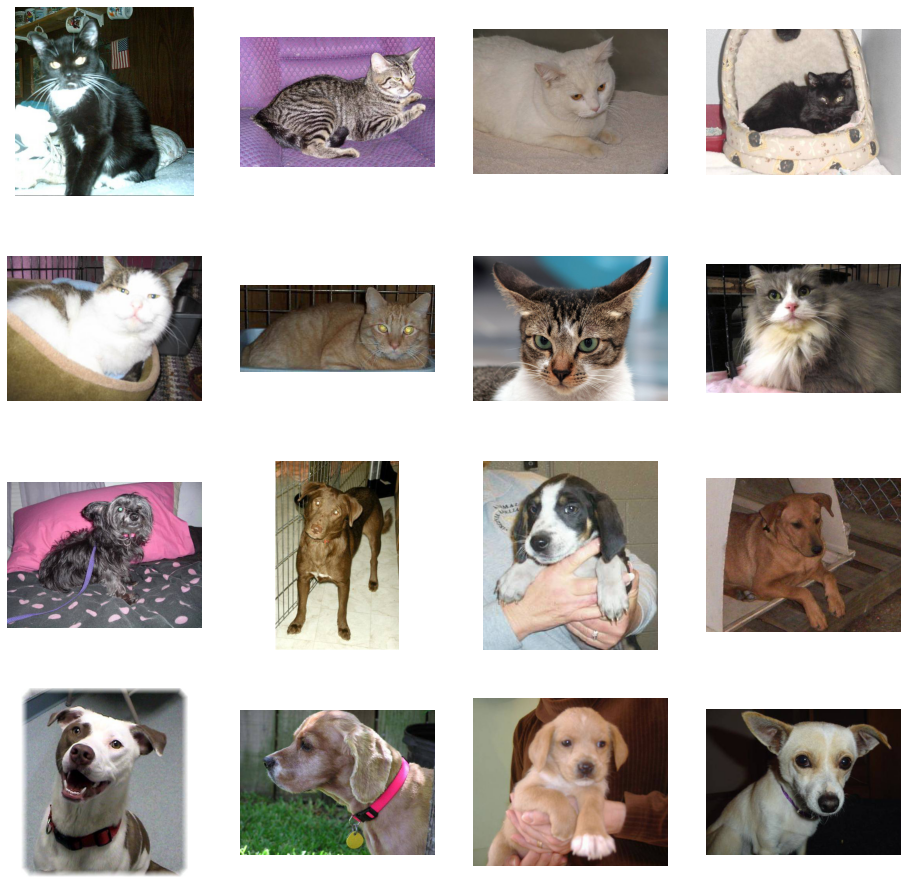

In [34]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [35]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [36]:
img_input = layers.Input(shape=(150, 150, 3))


x = layers.Flatten()(img_input)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(2, activation='sigmoid')(x)


model = Model(img_input, output)

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               34560512  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 34,561,538
Trainable params: 34,561,538
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [39]:
from imutils import paths

imagePathV = paths.list_images('/tmp/cats_and_dogs_filtered/validation')
imagePathD = paths.list_images('/tmp/cats_and_dogs_filtered/train')


data = []
labelsd = []
val = []
labelsv = []

In [40]:
from PIL import Image
import numpy as np

for imagePath in imagePathD:

  a = Image.open(imagePath)
  image = np.array(a.resize((150,150))) / 255.0
  data.append(image)

  label = imagePath.split(os.path.sep) [-2]
  labelsd.append(label)

In [41]:
for imagePath in imagePathV:

  a = Image.open(imagePath)
  image = np.array(a.resize((150,150))) / 255.0
  val.append(image)

  label = imagePath.split(os.path.sep) [-2]
  labelsv.append(label)


In [42]:
from sklearn.preprocessing import LabelBinarizer

# print(labelsv)
lb = LabelBinarizer()
labelsv1 = lb.fit_transform(labelsv)

labelsv = np.hstack((labelsv1, 1 - labelsv1))
labelsv

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [43]:
# print(labelsd)
lb = LabelBinarizer()
labelsd1 = lb.fit_transform(labelsd)
labelsd = np.hstack((labelsd1, 1 - labelsd1))
labelsd

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [44]:
from sklearn.model_selection import train_test_split

(trainX,testX, trainY, testY) = train_test_split(np.array(data),
np.array(labelsd), test_size=0.2)
print(trainX.shape)
print(testX.shape)


(1600, 150, 150, 3)
(400, 150, 150, 3)


In [45]:
e = 55
b = 32

H=model.fit(trainX, trainY,validation_data=(testX, testY), batch_size=b, epochs=e, shuffle=True )
predY=model.predict(testX)
print("\n Mengevaluasi Model yang telah ditraining dengan menggunakan data uji:")
model.evaluate(x=testX, y=testY, batch_size=32) 
list_of_metrics_to_plot = ['accuracy']

Epoch 1/55
50/50 [==============================] - 17s 334ms/step - loss: 29.0726 - acc: 0.4944 - val_loss: 10.4802 - val_acc: 0.5100
Epoch 2/55
50/50 [==============================] - 16s 325ms/step - loss: 13.2671 - acc: 0.5200 - val_loss: 15.1389 - val_acc: 0.5100
Epoch 3/55
50/50 [==============================] - 16s 329ms/step - loss: 10.1930 - acc: 0.5019 - val_loss: 7.8182 - val_acc: 0.5125
Epoch 4/55
50/50 [==============================] - 16s 328ms/step - loss: 6.0655 - acc: 0.5263 - val_loss: 2.9658 - val_acc: 0.5625
Epoch 5/55
50/50 [==============================] - 16s 319ms/step - loss: 4.1878 - acc: 0.5688 - val_loss: 2.5405 - val_acc: 0.5475
Epoch 6/55
50/50 [==============================] - 16s 326ms/step - loss: 3.3399 - acc: 0.5300 - val_loss: 3.5292 - val_acc: 0.4925
Epoch 7/55
50/50 [==============================] - 16s 320ms/step - loss: 2.0915 - acc: 0.5050 - val_loss: 1.4845 - val_acc: 0.5200
Epoch 8/55
50/50 [==============================] - 16s 330ms/st

In [46]:
#Apabila ingin menyimpan model hasil training
from keras.models import load_model

model.save('model.h5')

Text(0, 0.5, 'acc')

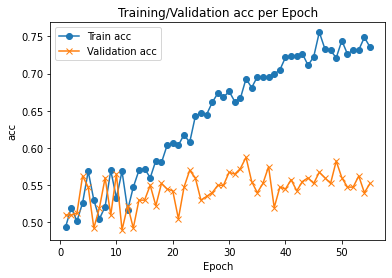

In [47]:
#grafik perbandingan val_acc dengan train_acc
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + H.history['acc'], 'o-')
ax.plot([None] + H.history['val_acc'], 'x-')

ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

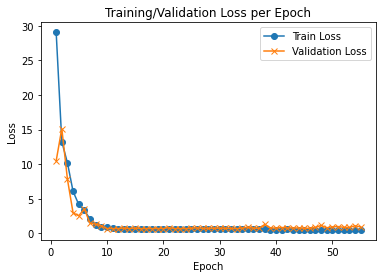

In [48]:
#grafik perbandingan loss train dengan loss val
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + H.history['loss'], 'o-')
ax.plot([None] + H.history['val_loss'], 'x-')

ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [49]:
#Fungsi Confusion Matrix
#Ubah target_names sesuai dengan kelas pada model Anda
#normalize False untuk menunjukkan nilai dalam bentuk berapa banyak jumlah TP,FP,FN,TN. Apabila True maka akan direpresentasikan dalam bentuk persentase.
import numpy as np


def plot_confusion_matrix(cm,
                          target_names=['Kucing', 'Anjing'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    if normalize:
      plt.imshow(cm/7, interpolation='nearest', cmap=cmap)
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [50]:

from sklearn.metrics import multilabel_confusion_matrix

predY[1]
rounded_labels=np.argmax(predY, axis=1)
rounded_labels[1]
rounded_predict=np.argmax(testY, axis=1)
rounded_predict[1]


0

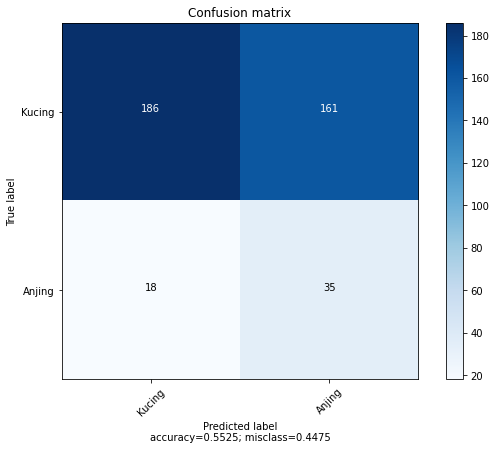

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(rounded_labels,  rounded_predict)
plot_confusion_matrix(cm)

In [56]:
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

# Sensitivity, hit rate, recall, atau true positive rate
TPR = TP/(TP+FN) #Recall
# Specificity atau true negative rate
TNR = TN/(TN+FP) 
# Precision atau positive predictive value
PPV = TP/(TP+FP) #Precision
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out atau false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
F1 = 2*((PPV*TPR)/(PPV+TPR))

print("Positif = Kucing, Negatif =  Anjing")
print("Nilai Precision = ",PPV)
print("Nilai Recall = ",TPR)
print("Nilai F1-Score = ",F1)

Positif = Kucing, Negatif =  Anjing
Nilai Precision =  0.5360230547550432
Nilai Recall =  0.9117647058823529
Nilai F1-Score =  0.6751361161524501


In [53]:

from sklearn.metrics import classification_report

print("[INFO] Mengevaluasi model...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] Mengevaluasi model...
              precision    recall  f1-score   support

        cats       0.54      0.91      0.68       204
        dogs       0.66      0.18      0.28       196

    accuracy                           0.55       400
   macro avg       0.60      0.55      0.48       400
weighted avg       0.60      0.55      0.48       400

